<a href="https://colab.research.google.com/github/Smriti79/CelebalTechnology_CustomerChurnPrediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

# Load directly from IBM's GitHub
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
import numpy as np

# Clean 'Churn' column: remove spaces, lowercase, and map to 1/0
df['Churn'] = df['Churn'].str.strip().str.lower()
df['Churn'] = df['Churn'].map({'yes': 1, 'no': 0})

# Drop any rows where Churn couldn't be mapped (just in case)
df.dropna(subset=['Churn'], inplace=True)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Drop rows with missing values
df.dropna(inplace=True)

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

print("Final shape after preprocessing:", df.shape)
df.head()


Final shape after preprocessing: (7032, 7062)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0.064303,-0.260878,-0.173740,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.239504,-0.363923,-0.959649,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.512486,-0.747850,-0.195248,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.239504,0.196178,-0.940457,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Ensure no NaNs in y
assert y.isna().sum() == 0, "y still contains NaN values"

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.86      1033
           1       0.65      0.44      0.52       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407

ROC-AUC Score: 0.6762881074281336


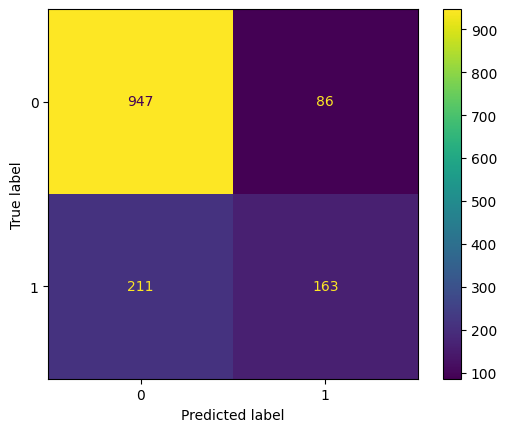

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


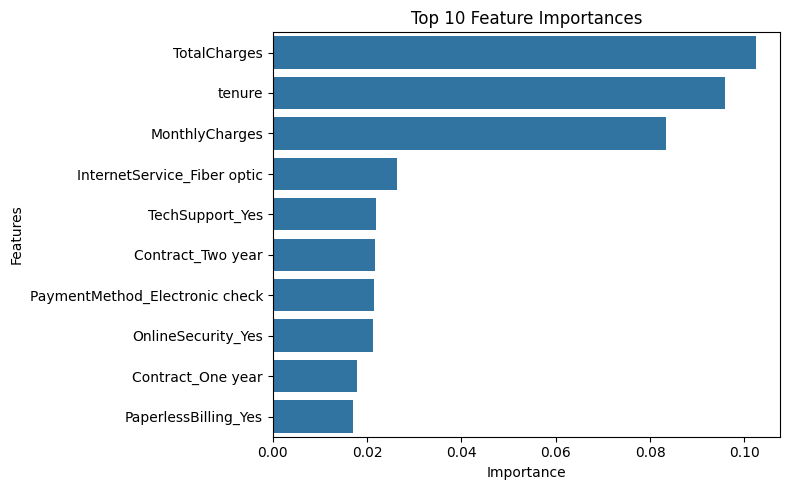

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 important features
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.nlargest(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
